In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Gradientenverfahren 1D

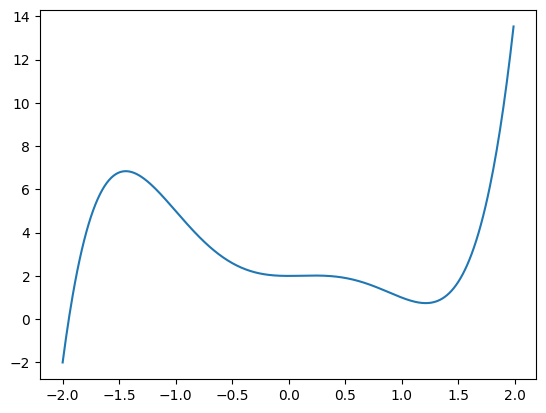

In [23]:
# Funktion definieren
def fn1d(x: float) -> float:
    return x**5 - 3 * x**3 + x**2 + 2


# Händisch Ableitung bestimmen
def fn1d_prime(x: float) -> float:
    return 5 * x**4 - 9 * x**2 + 2 * x


# Visualize fn in [-2, 2]
xmin = -2
xmax = 2
vals = [fn1d(x) for x in np.arange(xmin, xmax, 0.01)]
fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(xmin, xmax, 0.01), vals)
plt.show()
plt.close()


# Lokales Minimum finden mit Gradientenverfahren
x = 2  # Startpunkt
lr = 1e-2  # Schrittgröße (aka. Learning Rate)
num_rep_1d = 50
grad_diff = fn1d_prime(x)
change_1d = True
ys = []
xs = []
while change_1d is True:
    for i in range(num_rep_1d):
        if np.absolute(grad_diff / (i + 1)) >= 0.005:
            grad = fn1d_prime(x)
            grad_diff += grad
            ys.append(fn1d(x))
            xs.append(x)
            x = x - lr * grad  # optimize
        else:
            change_1d = False
    grad_diff = 0
    # Plot fn mit x

In [24]:
import plotly.express as px
import pandas as pd

xmin = -2
xmax = 2
x = np.arange(xmin, xmax, 0.01)
y = [fn1d(val) for val in x]

df = pd.DataFrame(dict(x=x, y=y))
fig = px.line(df, x="x", y="y", title="1-dimensional Graph")

fig.show()

In [25]:
import plotly.graph_objects as go


print(len(ys))
x = np.arange(xmin, xmax, 0.01)
y = [fn1d(val) for val in x]

fig = go.Figure(
    data=[
        go.Scatter(
            x=x,
            y=y,
            mode="lines",
            line=dict(color="green", width=1),
        ),
        go.Scatter(
            x=[-x[0]], y=[ys[0]], mode="markers", marker=dict(color="red", size=10)
        ),
    ]
)

fig.update_layout(
    width=1600,
    height=1080,
    xaxis=dict(range=(np.min(x) - 1, np.max(x) + 1), autorange=False, zeroline=False),
    yaxis=dict(range=(np.min(y) - 1, np.max(y) + 1), autorange=False, zeroline=False),
    title_text="Gradient Descent Animation",
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(
                    args=[
                        None,
                        {
                            "frame": {"duration": 1000, "redraw": False},
                            "fromcurrent": True,
                            "transition": {"duration": 1000},
                        },
                    ],
                    label="Play",
                    method="animate",
                )
            ],
        )
    ],
)

fig.update(
    frames=[
        go.Frame(data=[go.Scatter(x=[xs[k]], y=[ys[k]])], traces=[1])
        for k in range(num_rep_1d)
    ]
)

fig.show()

50


# Gradientenverfahren 2D

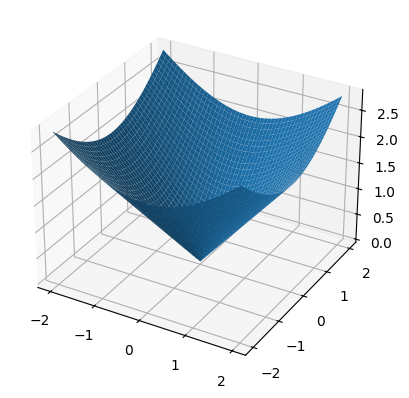

2.8544953854119208e-05 7.136238463529802e-05 2.8544953854119208e-05 7.136238463529802e-05


In [75]:
# Funktion definieren
def fn2d(x, y) -> float:
    return np.sqrt(np.pow(x, 2) + np.pow(y, 2))


# Ableitung
def fn2d_prime(x: float, y: float) -> np.ndarray:  # gibt 2D Array zurück
    partial_x = 2 * x  # leite f nach x ab, lass y konstant
    partial_y = 2 * y  # leite f nach y ab, lass x konstant
    return np.array([[partial_x], [partial_y]], ndmin=2)


min = -2
max = 2
# Visualize fn in [(-2, -2), (2, 2)]
r = np.arange(min, max, 0.01)
x, y = np.meshgrid(r, r)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

vals = fn2d(x, y)

ax.plot_surface(x, y, vals)
plt.show()
plt.close()

# Lokales Minimum finden mit Gradientenverfahren
x_start = 2.0  # Startpunkt
y_start = 2.0
lr = 1e-1  # Schrittgröße
num_rep_2d = 50
grad_xy_diff = fn2d_prime(x_start, y_start)
change_2d = True


while change_2d == True:
    for i in range(num_rep_2d):
        if np.absolute(np.mean(grad_xy_diff)) / (i + 1) >= 1e-1 and i == 0:
            grad_xy = fn2d_prime(x_start, y_start)
            x_start = x_start - lr * grad_xy[0, 0]
            y_start = y_start - lr * grad_xy[1, 0]
        elif np.absolute(np.mean(grad_xy_diff)) / (i + 1) >= 1e-1:
            grad_xy = fn2d_prime(x_start, y_start)
            grad_xy_diff[0, 0] += grad_xy[0, 0]
            grad_xy_diff[1, 0] += grad_xy[1, 0]
            x_start = x_start - lr * grad_xy[0, 0]
            y_start = y_start - lr * grad_xy[1, 0]
        else:
            change_2d = False
    grad_xy_diff[0, 0] = grad_xy_diff[1, 0] = 0
    print(x_start, grad_xy[0, 0], y_start, grad_xy[1, 0])

    change_2d = False

In [74]:
sh_0, sh_1 = vals.shape
x, y = np.linspace(start=min, stop=max, num=sh_0), np.linspace(
    start=min, stop=max, num=sh_1
)
x, y = np.meshgrid(x, y)

print(x.shape, y.shape, vals.shape)

fig = go.Figure(data=[go.Surface(z=vals, x=x[0, :], y=x[1, :])])

fig.update_layout(title="Surface Plot", width=500, height=500, autosize=False)

fig.show()

(400, 400) (400, 400) (400, 400)
